In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from PIL import Image
import pickle
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
path1 = os.getcwd() + "/../../data/npy-data/"
path2 = os.getcwd() + "/../dataset/"
res = "504"

trainX = np.load(path1 + "trainSamples-"+res+"-withColour.npy")
trainY = np.load(path2 + "train/trainLabels.npy").astype("int")
testX = np.load(path1 + "testSamples-"+res+"-withColour.npy")
testY = np.load(path2 + "test/testLabels.npy").astype("int")

/home/hwixley/Packages/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.83      0.92      0.87       150
           1       0.91      0.81      0.86       150

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300



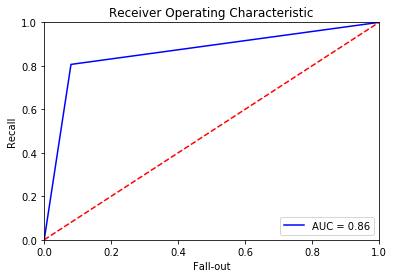

In [3]:
logR = LogisticRegression().fit(trainX,trainY)
predY = logR.predict(testX)

print(classification_report(testY, predY))

pickle.dump(logR, open("log-reg-model-"+res+".pkl","wb"))

false_positive_rate, recall, thresholds = roc_curve(testY,predY)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [6]:
arr = np.empty((2,896*504*3))
arr[0,:] = np.asarray(Image.open("/home/hwixley/Downloads/image.png").resize((896,504))).reshape(1,-1)
arr[1,:] = np.asarray(Image.open("/home/hwixley/Downloads/image2.png").resize((896,504))).reshape(1,-1)

print(logR.predict(arr))

[0 1]


In [11]:
logr = pd.read_pickle(os.getcwd() + "/../../model-pickle-files/logR-model.pkl")

In [14]:
logr.predict(arr[0,:].reshape(1,-1))[0]

0